# K-Nearest Neighbors code
This notebook aims to develop one of the simplest machine learning algorithms, K-Nearest Neighbors (KNN). 
I will use the Euclidean distance to implement the algorithm, and as a measure of success, I will compare its accuracy with the algorithm from the Scikit-learn library. I will also plot the decision boundary and compare it with the decision boundary generated by the Yellowbrick library.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_blobs, make_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.contrib.classifier import DecisionViz
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from sklearn.metrics import accuracy_score


np.set_printoptions(suppress=True)

<Axes: xlabel='feature-1', ylabel='feature-2'>

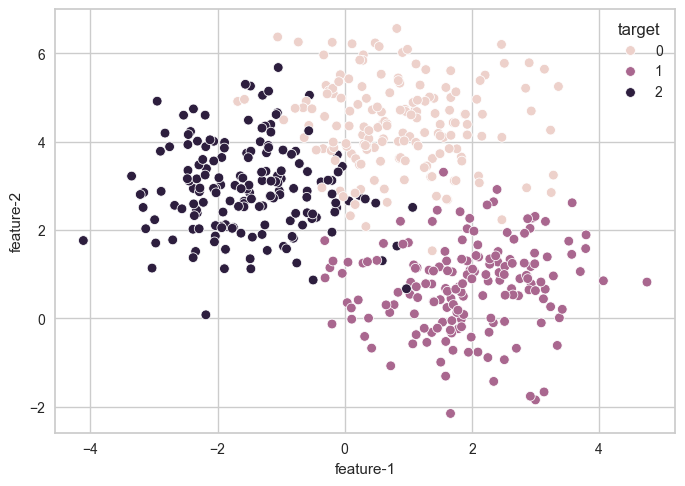

In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=0)

df = pd.DataFrame(
    {
        'feature-1': X[:, 0],
        'feature-2': X[:, 1],
        'target': y
    }
)

features = ["feature-1", "feature-2"]
target = "target"

sns.scatterplot(data=df, x=features[0], y=features[1], hue=target)

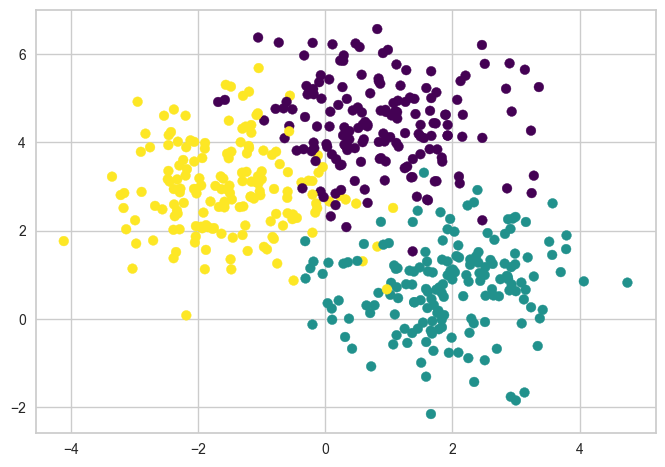

In [5]:
features = ["feature-1", "feature-2"]
target = "target"
cmap = plt.cm.viridis
plt.scatter(df[features[0]], df[features[1]], c=df['target'],cmap=cmap)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [4]:
X_train[0:10]

array([[ 0.94808785,  4.7321192 ],
       [-1.47532907,  3.78515889],
       [ 0.47823763,  6.23331938],
       [ 2.99831361, -1.84201351],
       [ 1.09476314,  0.1045463 ],
       [ 1.2911236 , -0.54012781],
       [ 1.6164016 ,  2.68683128],
       [-2.28901853,  2.03010212],
       [ 2.11567076,  3.06896151],
       [ 3.5685956 ,  1.45079572]])

In [5]:
y_train[0:10]

array([0, 2, 0, 1, 1, 1, 0, 2, 0, 1])

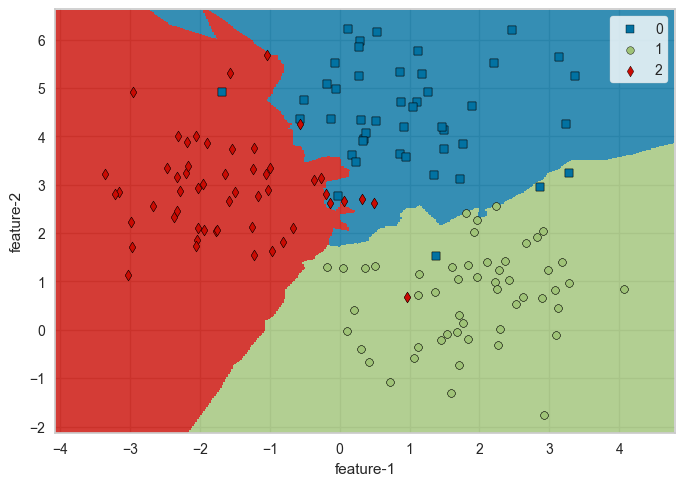

<Axes: xlabel='feature-1', ylabel='feature-2'>

In [6]:
clf = KNeighborsClassifier(
    n_neighbors=5,
    metric="euclidean"
    )

viz = DecisionViz(
    clf,
    title="Nearest Neighbors",
    features=features
)

viz.fit(X_train, y_train)
viz.draw(X_test, y_test)
viz.show()

In [7]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Previsões no conjunto de teste
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9266666666666666


In [8]:
result = []
for test_point in X_test:
    a = ((X_train - test_point)**2)
    a1 = np.sum(a,axis=1)
    a1 = a1.flatten().reshape(a1.shape[0],1)
    a2 = y_train.flatten().reshape(a1.shape[0],1)
    horz_stack = np.hstack((a2, a1))

    df = pd.DataFrame(horz_stack)
    df = df.sort_values(by=[1]).iloc[0:5,:]
    nearest = np.array(df)
    unique, counts = np.unique(nearest, return_counts=True)
    c = unique[np.argmax(counts)]
    result.append(c)
y_pred_2 = np.array(result)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
    
    

0.9266666666666666


In [18]:
x_min, x_max = -4, 5
y_min, y_max = -2, 7

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
xx_shape = xx.shape

In [19]:
yy_ = yy.flatten()
yy_ = yy.reshape(-1,1)

In [20]:
xx_ = xx.flatten()
xx_ = xx.reshape(-1,1)

In [21]:
horz_stack = np.hstack((xx_, yy_))
horz_stack

array([[-4.  , -2.  ],
       [-3.95, -2.  ],
       [-3.9 , -2.  ],
       ...,
       [ 4.85,  6.95],
       [ 4.9 ,  6.95],
       [ 4.95,  6.95]])

In [22]:
result = []
for test_point in horz_stack:
    a = ((X_train - test_point)**2)
    a1 = np.sum(a,axis=1)
    a1 = a1.flatten().reshape(a1.shape[0],1)
    a2 = y_train.flatten().reshape(a1.shape[0],1)
    horz_stack = np.hstack((a2, a1))

    df = pd.DataFrame(horz_stack)
    df = df.sort_values(by=[1]).iloc[0:5,:]
    nearest = np.array(df)
    unique, counts = np.unique(nearest, return_counts=True)
    c = unique[np.argmax(counts)]
    result.append(c)
y_pred_2 = np.array(result)

In [23]:
Z = y_pred_2
Z = Z.reshape(xx_shape)

In [24]:
Z.shape

(180, 180)

In [25]:
Z

array([[2., 2., 2., ..., 1., 1., 1.],
       [2., 2., 2., ..., 1., 1., 1.],
       [2., 2., 2., ..., 1., 1., 1.],
       ...,
       [2., 2., 2., ..., 0., 0., 0.],
       [2., 2., 2., ..., 0., 0., 0.],
       [2., 2., 2., ..., 0., 0., 0.]])

In [58]:
df2

,0,1,color
0,0.948088,4.732119,0
1,-1.475329,3.785159,2
2,0.478238,6.233319,0
3,2.998314,-1.842014,1
4,1.094763,0.104546,1
...,...,...,...
345,1.131218,4.681950,0
346,2.031844,1.976858,1
347,-0.637628,4.091047,0
348,0.206354,4.843037,0


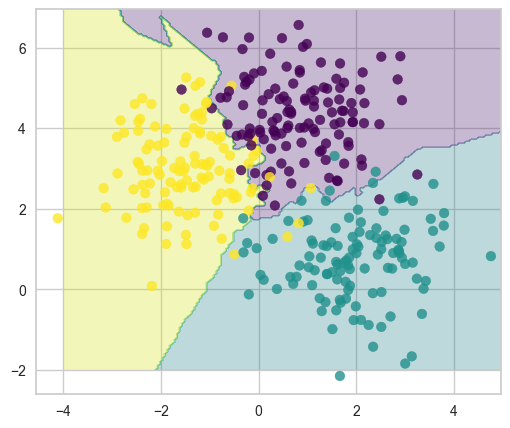

In [81]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
#cmap_bold = ListedColormap(['#FF0000', '#0000FF'])


cmap = plt.cm.viridis
plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

#colors = df['color']
#plt.scatter(df[0], df[1], c=colors,cmap=cmap)
df2 = pd.DataFrame(X_train)
df2['color'] = y_train
plt.scatter(df2[0], df2[1], c=df2['color'],cmap=cmap, alpha=0.8)

<Figure size 600x500 with 0 Axes>

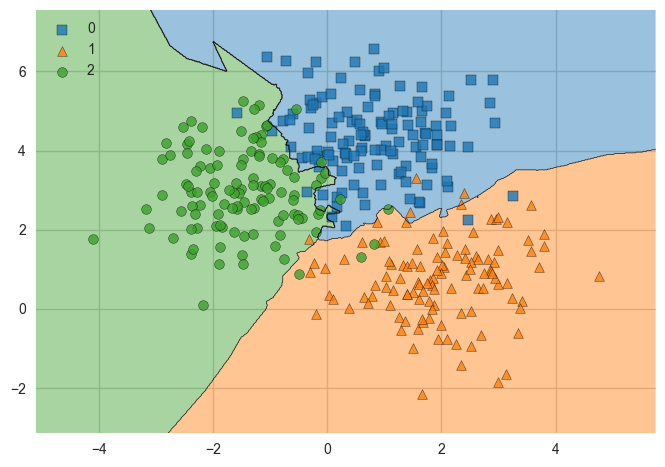

<Figure size 600x500 with 0 Axes>

In [82]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train, clf=clf, legend=2)
plt.figure(figsize=(6, 5))


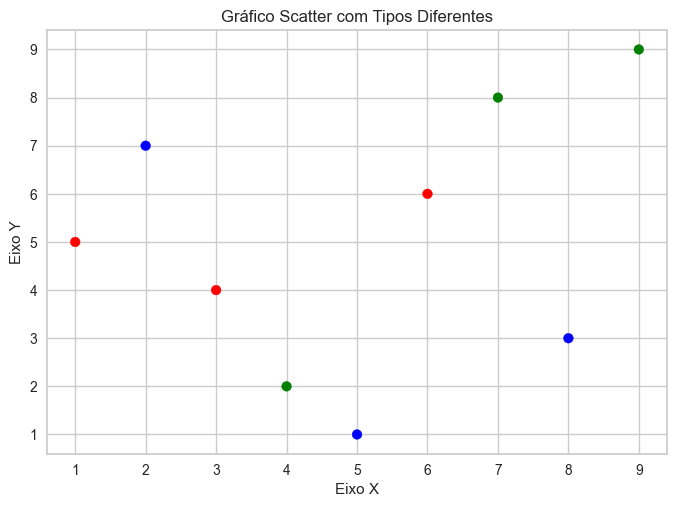

In [28]:
import matplotlib.pyplot as plt

# Exemplo de dados
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [5, 7, 4, 2, 1, 6, 8, 3, 9]
types = y_test

# Mapeando cada tipo para uma cor
colors = {'0': 'red', '1': 'blue', '2': 'green'}
point_colors = [colors[point_type] for point_type in types]

# Criando o gráfico scatter
plt.scatter(x, y, c=point_colors)

# Adicionando labels e título
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Gráfico Scatter com Tipos Diferentes')

# Exibindo o gráfico
plt.show()

In [29]:
sns.scatterplot(x=features[0], y=features[1], hue=target)

['red', 'blue', 'red', 'green', 'blue', 'red', 'green', 'blue', 'green']

In [31]:
y_test

array([1, 2, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 2, 0,
       1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1,
       0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 2,
       2, 1, 2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2,
       2, 0, 1, 2, 2, 2, 2, 1, 1, 0, 1, 2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 2,
       1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 1])

In [48]:
df = pd.DataFrame(X_test)

In [49]:
df

,0,1
0,2.297385,0.008943
1,-2.184830,3.886765
2,-1.768242,2.039692
3,0.865729,5.323960
4,0.292259,5.963338
...,...,...
145,-0.261826,3.129379
146,-2.315573,4.012521
147,1.813248,2.415925
148,0.231515,3.477349


In [50]:
df['color'] = y_pred

<Axes: xlabel='0', ylabel='1'>

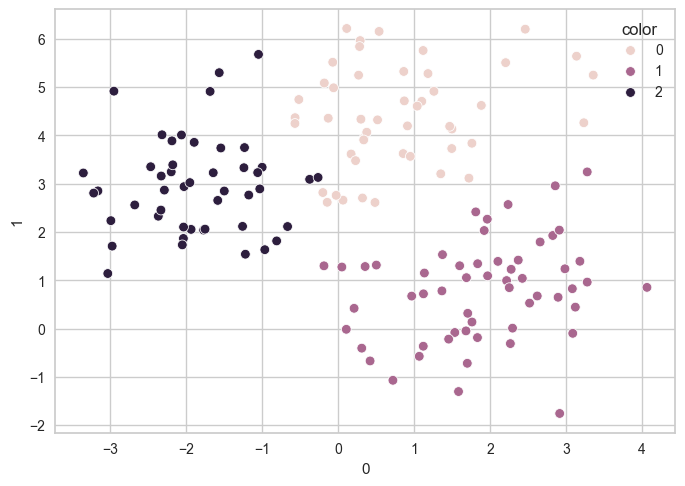

In [38]:
sns.scatterplot(data = df,x=0, y=1, hue='color')

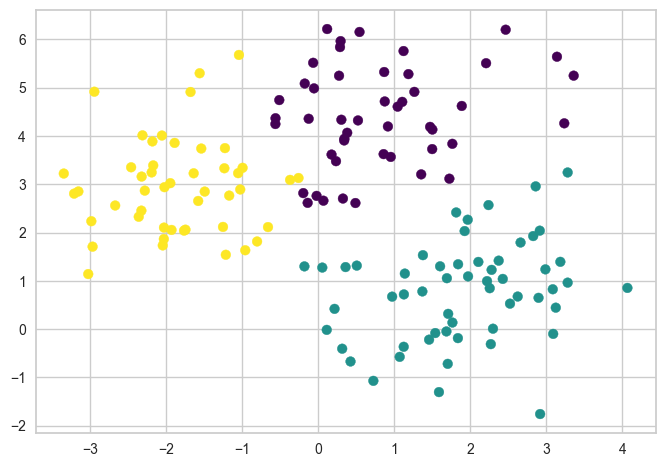

In [42]:
cmap = plt.cm.viridis
colors = df['color']
plt.scatter(df[0], df[1], c=colors,cmap=cmap)
plt.show()

In [ ]:
sns.heatmap(Z, cmap="viridis", xticklabels=20, yticklabels=20)